In [1]:
import pandas as pd
import matplotlib
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv("bank.csv", sep = ';')

In [3]:
numeric_columns = df.select_dtypes(include=['number'])
print(numeric_columns)


      age  balance  day  duration  campaign  pdays  previous
0      30     1787   19        79         1     -1         0
1      33     4789   11       220         1    339         4
2      35     1350   16       185         1    330         1
3      30     1476    3       199         4     -1         0
4      59        0    5       226         1     -1         0
...   ...      ...  ...       ...       ...    ...       ...
4516   33     -333   30       329         5     -1         0
4517   57    -3313    9       153         1     -1         0
4518   57      295   19       151        11     -1         0
4519   28     1137    6       129         4    211         3
4520   44     1136    3       345         2    249         7

[4521 rows x 7 columns]


{'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'}

In [30]:
def show_hist(df, column):

    plt.hist(df[column], bins=50, rwidth=0.9)
    plt.xlabel(column)  # Corrected typo here
    plt.ylabel('count')    # Corrected typo here
    plt.show()

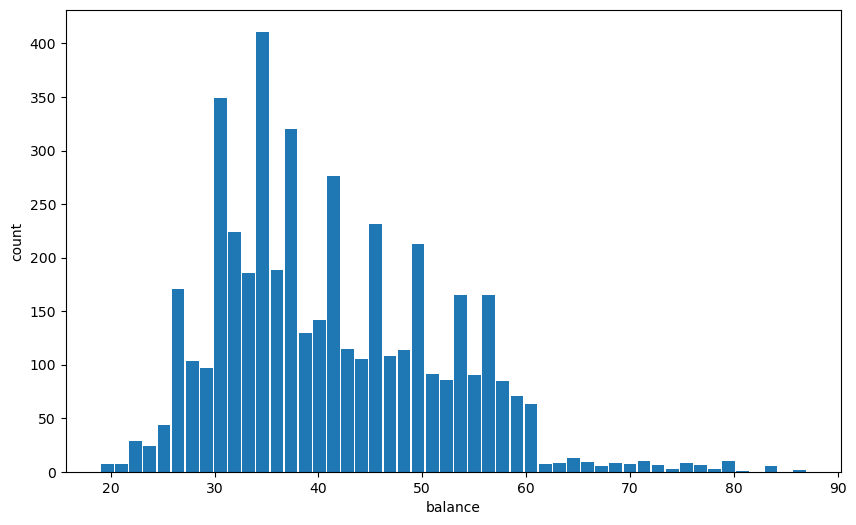

In [11]:
show_hist('age')

In [13]:
df['zscore'] = (df.age - df.age.mean()) / df.age.std()

In [14]:
df_no_outliers_age1 = df[(df.zscore> -3) & (df.zscore < 3)]

In [17]:
def show_no_outliers (df, column):
    
    plt.hist(df[column], bins=50, rwidth=0.9)
    plt.xlabel(column)  # Corrected typo here
    plt.ylabel('count')    # Corrected typo here
    plt.show()

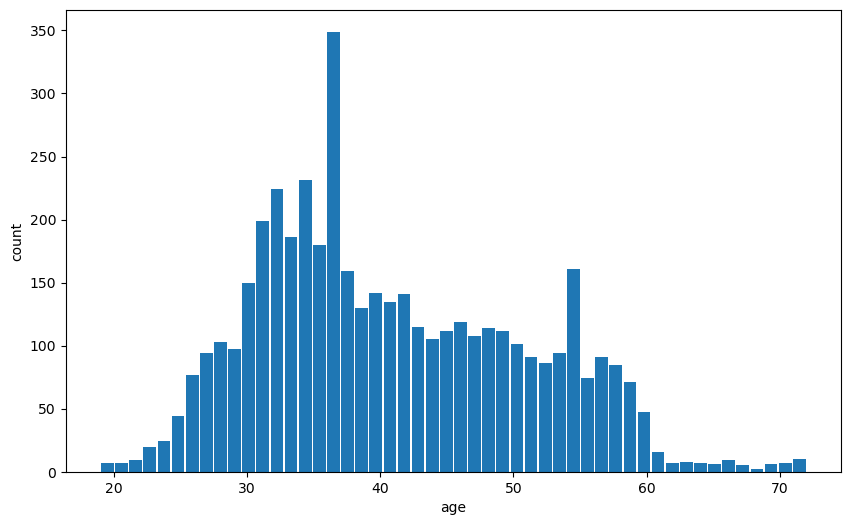

In [20]:
show_no_outliers (df_no_outliers_age1, 'age')

In [34]:
df = df_no_outliers

In [32]:

df['zscore'] = (df.duration - df.duration.mean()) / df.duration.std()
df_no_outliers_age1_balance2_duration3 = df[(df.zscore> -3) & (df.zscore < 3)]
    

/var/folders/zt/3bfd8lcx4tdf3zy37t37r8z80000gn/T/ipykernel_14036/1715287272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore'] = (df.duration - df.duration.mean()) / df.duration.std()


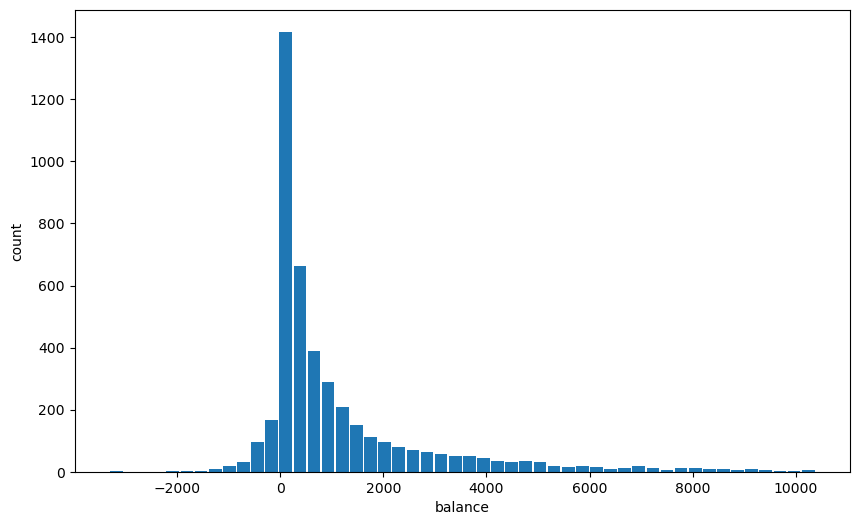

In [27]:
show_no_outliers (df_no_outliers_age1_balance2, 'balance')

In [33]:
def no_outliers(df, column):
    df_copy = df.copy()  # Create a copy to avoid modifying the original DataFrame

    zscore = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()
    
    df_copy.loc[:, 'zscore'] = zscore
    
    df_no_outliers = df_copy[(zscore > -3) & (zscore < 3)]
    
    return df_no_outliers


# Remove outliers from the 'duration' column using the function
df_no_outliers = no_outliers(df, 'duration')

# Display the DataFrame without outliers
print(df_no_outliers)


      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [35]:
df_no_outliers = no_outliers(df, 'campaign')

In [36]:
df = df_no_outliers

In [37]:
df_no_outliers = no_outliers(df, 'pdays')

In [38]:
df = df_no_outliers

In [39]:
df_no_outliers = no_outliers(df, 'previous')

In [40]:
df = df_no_outliers

In [41]:
df.shape

(3954, 18)

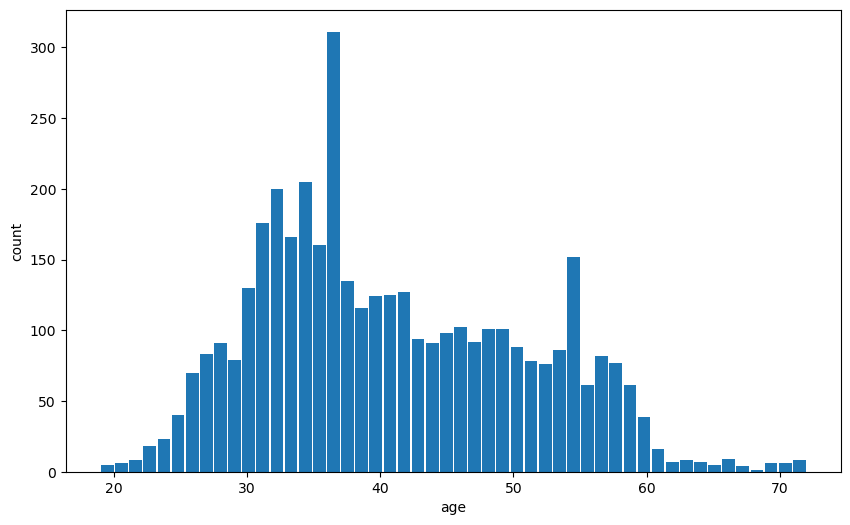

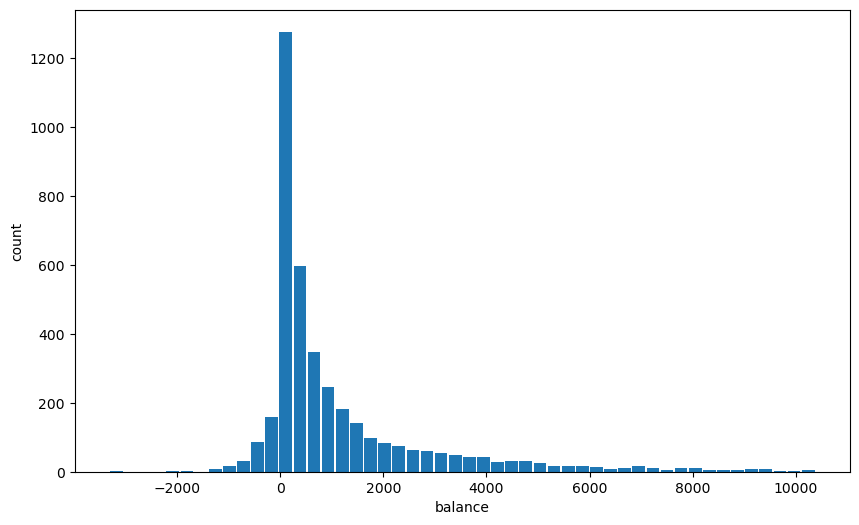

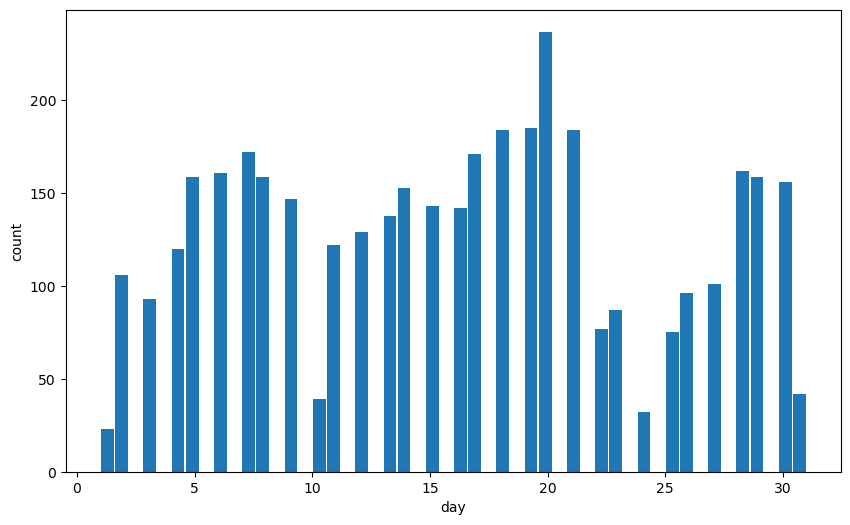

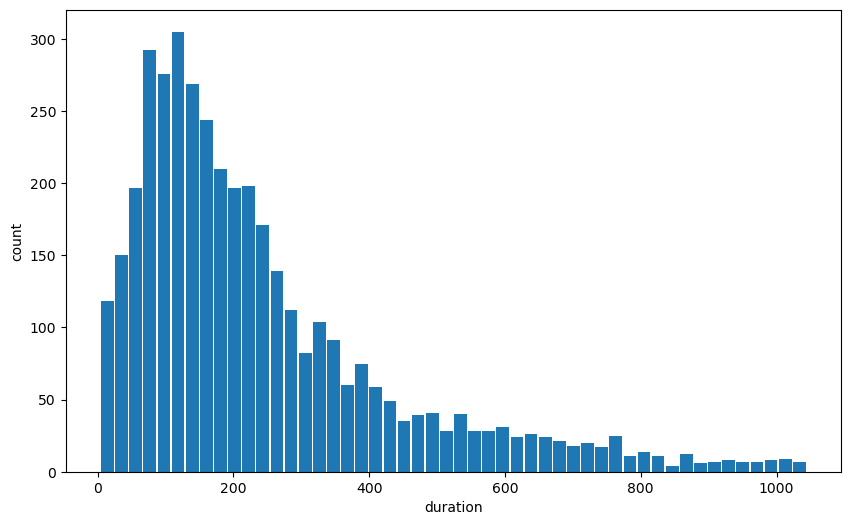

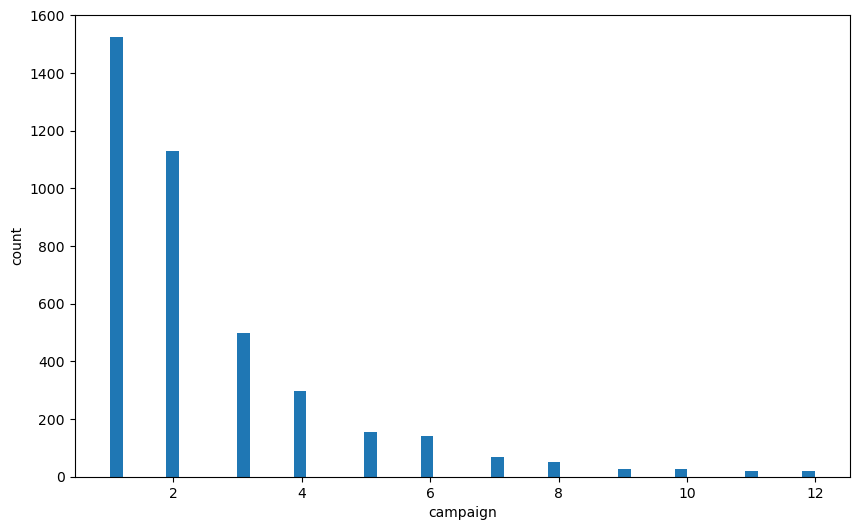

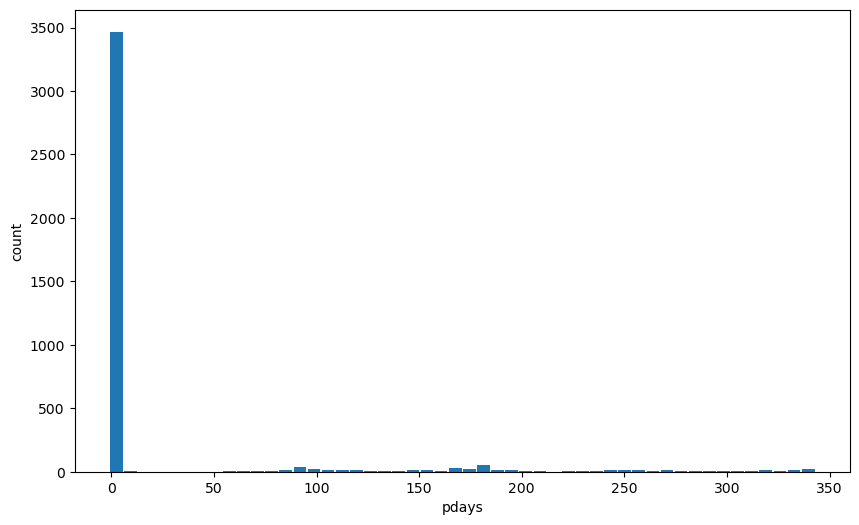

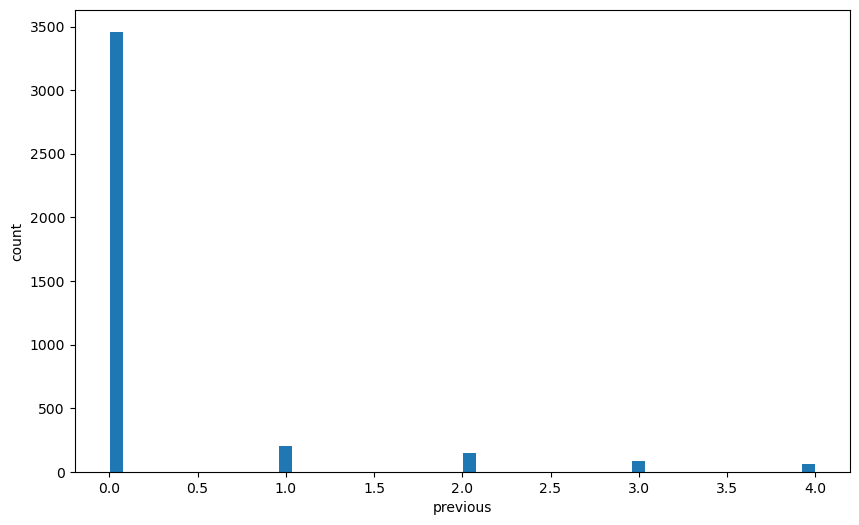

In [43]:
show_hist(df, 'age')
show_hist(df, 'balance')
show_hist(df, 'day')
show_hist(df, 'duration')
show_hist(df, 'campaign')
show_hist(df, 'pdays')
show_hist(df, 'previous')

In [44]:
df.shape

(3954, 18)

In [45]:
df.to_csv("Bank_cleaned.csv")